In [1]:
from numpy import genfromtxt
import numpy as np
import os

framerate = 1500

# Import data

In [2]:
filename_x = './data/x_displacements_filtered_mm.csv'
filename_y = './data/y_displacements_filtered_mm.csv'

arr_test = np.genfromtxt(filename_x, dtype=np.float32, delimiter=',')

coords_arr = np.zeros((arr_test.shape[0], arr_test.shape[1], 2))

# Get data for x and y
coords_arr[:, :, 0] = np.genfromtxt(filename_x, dtype=np.float32, delimiter=',')
coords_arr[:, :, 1] = np.genfromtxt(filename_y, dtype=np.float32, delimiter=',')

# Import matplotlib

In [3]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib import gridspec


matplotlib.rcParams["font.size"] = 10

plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)

fig_size = (4, 3.5)
dpi = 300

colors_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Marging for better visualization
margin_mm = 5

# Plot the output

In [4]:
def plot_xy(data, pt_idx):

    fig = plt.figure(figsize=(4,2.2), dpi = dpi)

    ax_2 = fig.add_subplot(212)
    ax_1 = fig.add_subplot(211, sharex=ax_2)

    ax_1.plot(data[:, pt_idx, 0], 
             markersize = 1,
             color='blue',
             label = 'x')
    
    ax_1.set_title('Point ' + str(pt_idx) + ' position')
    ax_1.set_ylabel('mm')

    ax_1.grid()
    ax_1.legend()

    ax_2.plot(data[:, pt_idx, 1], 
             markersize = 1,
             color='red',
             label = 'y')

    ax_2.grid()
    ax_2.legend()
    
    ax_2.set_xlabel('Time samples')
    ax_2.set_ylabel('mm')
    

    plt.subplots_adjust(hspace=0.4)
    plt.show()
    
    return fig

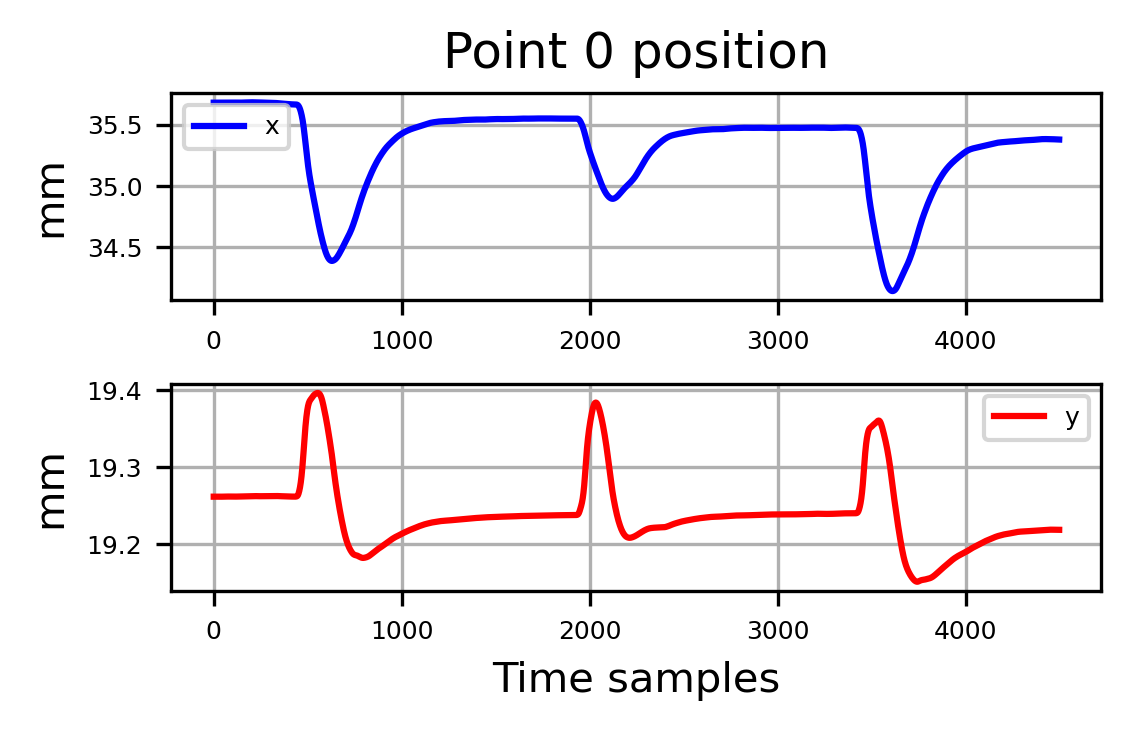

In [5]:
point_idx = 0

fig = plot_xy(coords_arr, point_idx)

In [6]:
fig.savefig('raw_LK_output_point' + str(point_idx) + '.png', format = 'png', dpi = 300, bbox_inches='tight')

# Filter the x and y data if necessary

In [7]:
# from scipy import signal

# numtaps = 201

In [8]:
# fig = plt.figure(figsize=(4, 2), dpi = dpi)

# # b, a = signal.butter(101, 0.01, 'low', analog=False)

# b = signal.firwin(numtaps, 0.085, pass_zero=True)
# a = 1

# # cutoff = 0.003
# # trans_width = 0.01
# # fs = 1

# # b = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs], [1, 0], Hz=fs)
# # a = 1


# w, h = signal.freqz(b, fs=1)
# plt.plot(w, 20 * np.log10(abs(h)))
# plt.title('Filter frequency response')
# plt.xlabel('Frequency')
# plt.ylabel('Amplitude [dB]')
# plt.margins(0, 0.1)
# plt.grid(which='both', axis='both')
# # plt.axvline(100, color='green') # cutoff frequency
# plt.show()

In [9]:
# # Save a figure
# fig.savefig('filter_freqz'+ '.png', format = 'png', dpi = 300, bbox_inches='tight')

In [10]:
# # Filter the data
# coords_arr_filt = signal.filtfilt(b, a, 
#                                   coords_arr, 
#                                   axis=0)

In [11]:
coords_arr_filt = coords_arr

In [12]:
def plot_filt_coords(data, data_filt, pt_idx):

    fig = plt.figure(figsize=(4,2.2), dpi = dpi)

    ax_2 = fig.add_subplot(212)
    ax_1 = fig.add_subplot(211, sharex=ax_2)


    ax_1.plot(data[:, pt_idx, 0], 
             markersize = 1,
    #          color='blue',
             label = 'x_filt')
    ax_1.plot(data_filt[:, pt_idx, 0], 
             markersize = 1,
    #          color='blue',
             label = 'x_filt')

    ax_1.set_title('Point ' + str(pt_idx) + ' position')
    ax_1.set_ylabel('mm')

    ax_1.grid()
    ax_1.legend()

    ax_2.plot(data[:, pt_idx, 1], 
             markersize = 1,
    #          color='red',
             label = 'y')
    ax_2.plot(data_filt[:, pt_idx, 1], 
             markersize = 1,
    #          color='red',
             label = 'y_filt')

    ax_2.grid()
    ax_2.legend()

    ax_2.set_xlabel('Time samples')
    ax_2.set_ylabel('mm')


    plt.subplots_adjust(hspace=0.4)
    plt.show()
    
    return fig

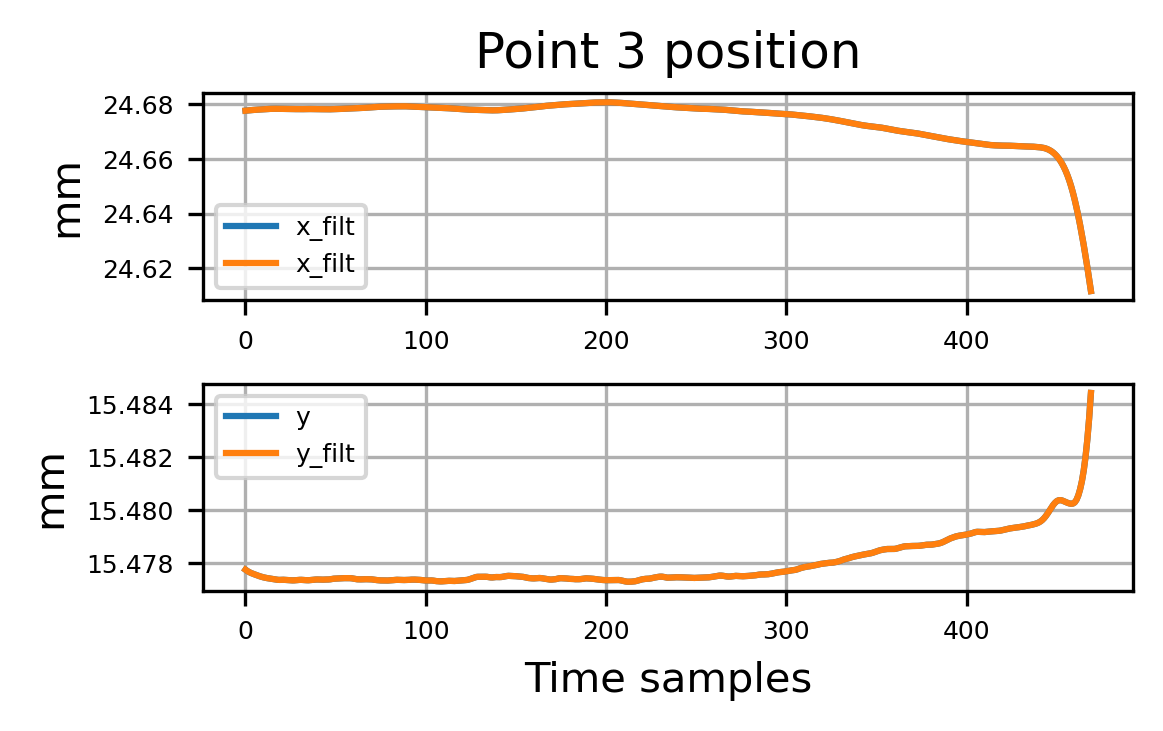

In [13]:
point_idx = 3
fig_filt = plot_filt_coords(coords_arr[:470,:,:], coords_arr_filt[:470,:,:], point_idx)

In [14]:
fig_filt.savefig('filt_LK_output_point' + str(point_idx) + '.png', format = 'png', dpi = 300, bbox_inches='tight')

# Calculate the absolute speeds using central differencing and filtered data


In [15]:
dt = 1/framerate
speeds = np.gradient(coords_arr_filt, dt, axis = 0)

In [16]:
def plot_xy_speeds(data, pt_idx):

    fig = plt.figure(figsize=(4,2.2), dpi = dpi)

    ax_2 = fig.add_subplot(212)
    ax_1 = fig.add_subplot(211, sharex=ax_2)

    ax_1.plot(data[:, pt_idx, 0], 
             markersize = 1,
             color='blue',
             label = 'Vx')
    
    ax_1.set_title('Point ' + str(pt_idx))
    ax_1.set_ylabel('Speed mm/s')

    ax_1.grid()
    ax_1.legend()

    ax_2.plot(data[:, pt_idx, 1], 
             markersize = 1,
             color='red',
             label = 'Vy')
    
    ax_2.set_ylabel('Speed mm/s')
    ax_2.set_xlabel('Time samples')

    ax_2.grid()
    ax_2.legend()

    plt.subplots_adjust(hspace=0.4)
    plt.show()
    
    return fig

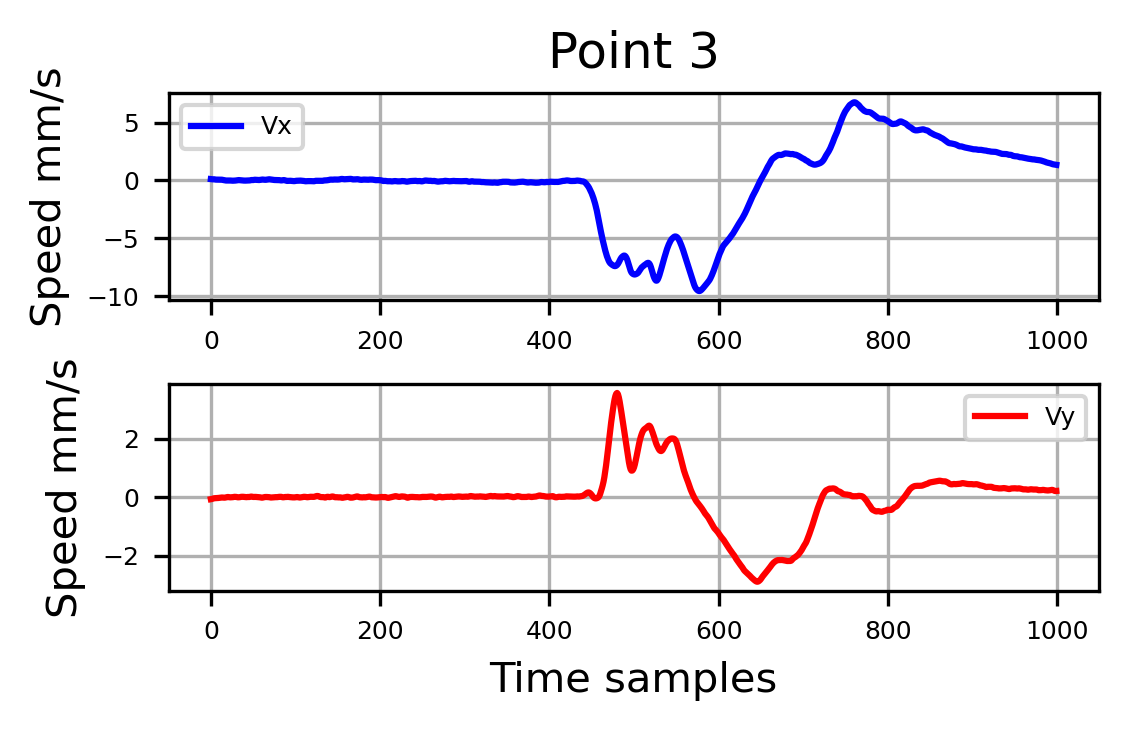

In [17]:
point_idx = 3
fig = plot_xy_speeds(speeds[:1000, :, :], point_idx)

In [18]:
# Save a figure
fig_filt.savefig('speeds_filt_point' + str(point_idx) + '.png', format = 'png', dpi = 300, bbox_inches='tight')

# Calculate the speeds along the fascicle

## Calculate the unit directions vectors to project the speeds


In [19]:
grad_arr = np.gradient(coords_arr_filt, axis = 1)
grad_arr = grad_arr/ np.linalg.norm(grad_arr, axis = -1, keepdims=True)

## Visualize the results

In [20]:
coords_arr_sel = coords_arr_filt[0:1000, :, :]
grad_arr_sel = grad_arr[0:1000, :, :]

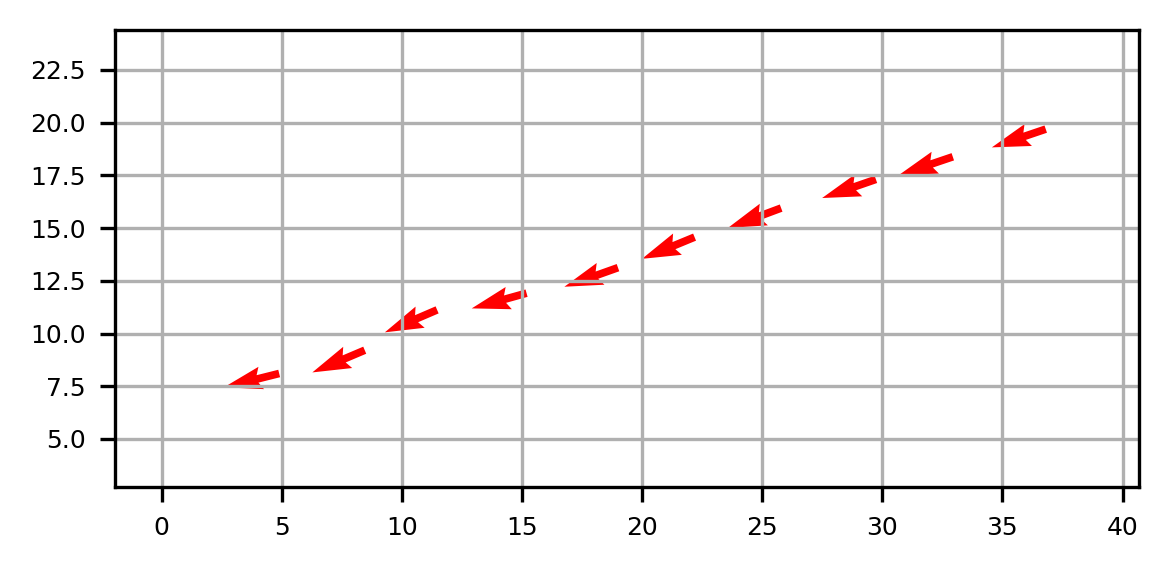

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# For arrow length
scale_factor = 1

X, Y = np.mgrid[:2*np.pi:10j,:2*np.pi:5j]
U = np.cos(X)
V = np.sin(Y)

fig = plt.figure(figsize=(4, 2), dpi = dpi)
ax = fig.add_subplot(111)

Q = ax.quiver(coords_arr_filt[0,:,0], coords_arr_filt[0,:,1], 
              grad_arr_sel[0,:,0] * scale_factor, grad_arr_sel[0,:,1] * scale_factor, 
              pivot='mid', color='r', units='inches')

ax.set_xlim(np.min(coords_arr_sel[:, :, 0]) - margin_mm, 
            np.max(coords_arr_sel[:, :, 0]) + margin_mm)
ax.set_ylim(np.min(coords_arr_sel[:, :, 1]) - margin_mm, 
            np.max(coords_arr_sel[:, :, 1]) + margin_mm)

def update_quiver(num, Q, X, Y):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    U = grad_arr_sel[num,:,0]
    V = grad_arr_sel[num,:,1]

    Q.set_UVC(U,V)
    Q.set_offsets(coords_arr_filt[num,:,:])

    return Q,

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, X, Y),
                               frames=coords_arr_sel.shape[0], 
                               interval=10,
                               blit=False)
fig.tight_layout()
plt.grid()
plt.show()

In [22]:
HTML(anim.to_html5_video())

## Save the video (requires ffmpeg)

In [23]:
# Writer = matplotlib.animation.writers['ffmpeg']
# writer = Writer(fps=60, metadata=dict(artist='xy'), bitrate=3600)

# anim.save('direction_vectors_verification.mp4', writer=writer)

## Project speeds

In [24]:
speeds_proj = np.sum(np.multiply(speeds, grad_arr), axis = -1)

## Explore parallel to the fascicle and orthogonal components

In [25]:
speeds_proj_fasc = speeds_proj

In [26]:
temp =  speeds - np.multiply(speeds_proj_fasc.reshape(speeds_proj_fasc.shape[0], -1, 1), grad_arr)
speed_proj_orth = np.linalg.norm(temp, axis = -1)

## Plot all the components for each point

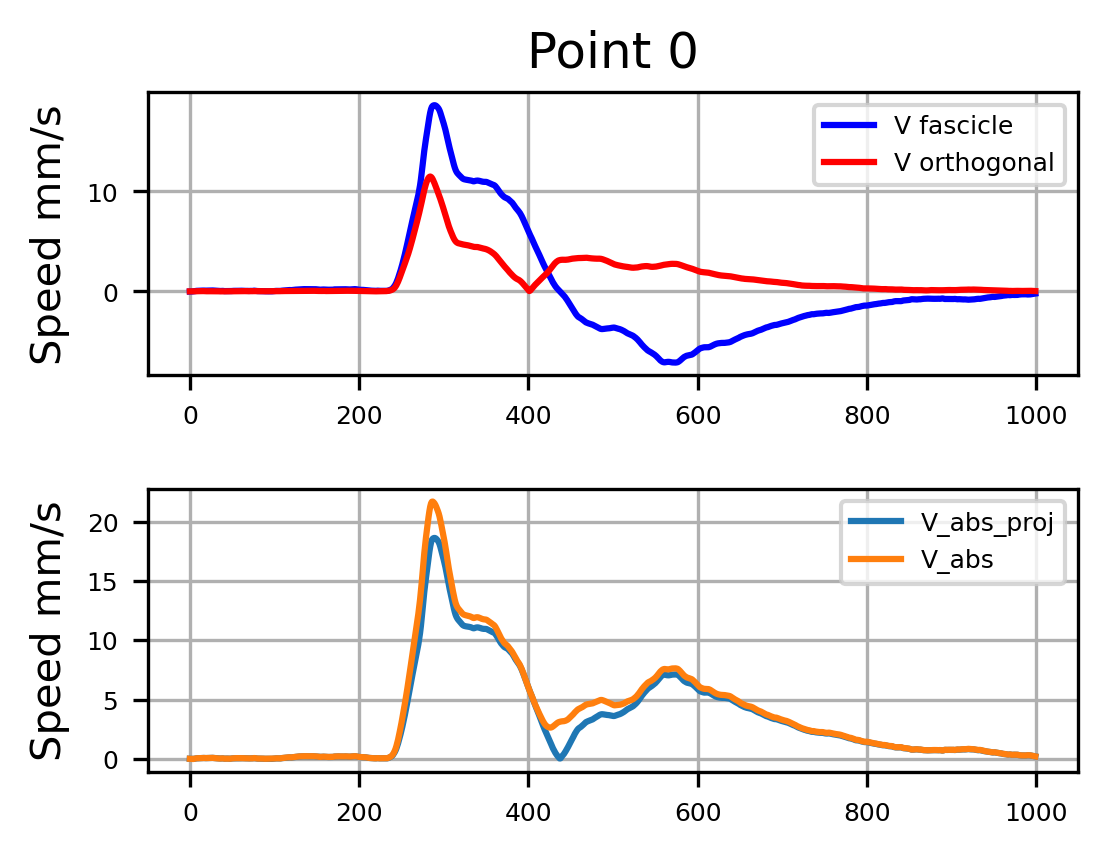

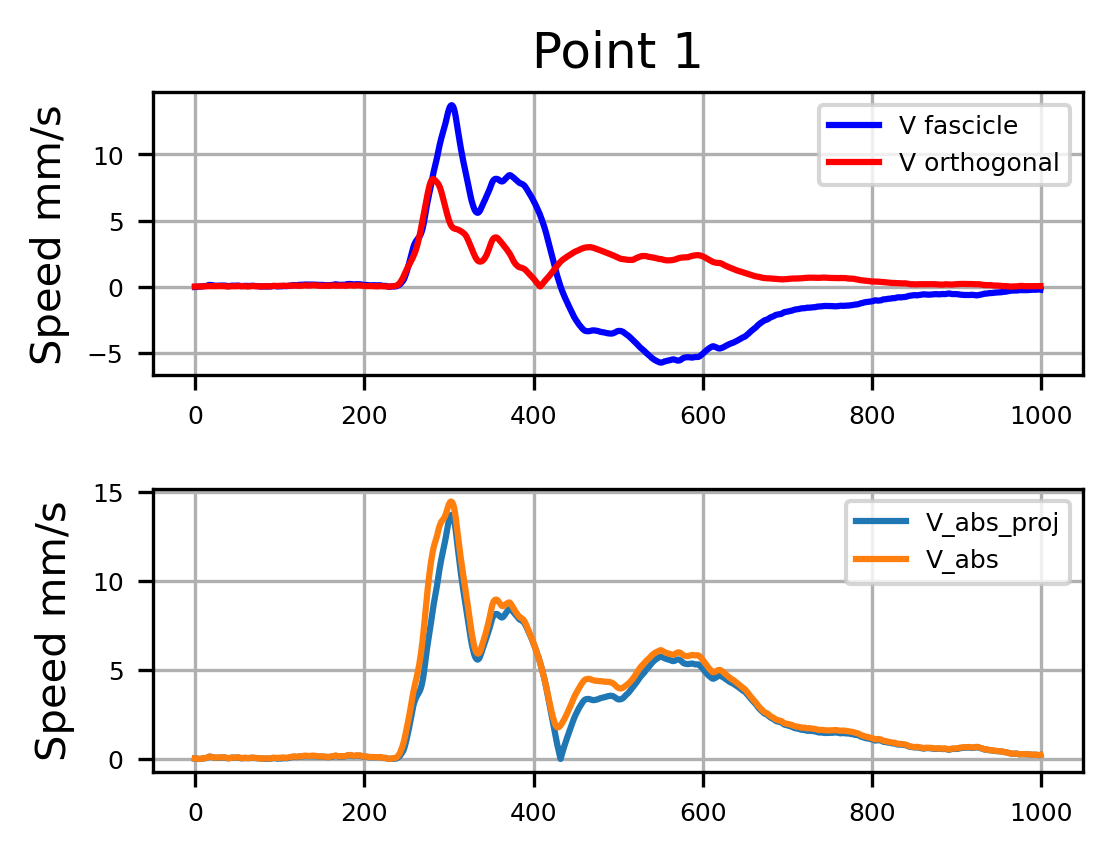

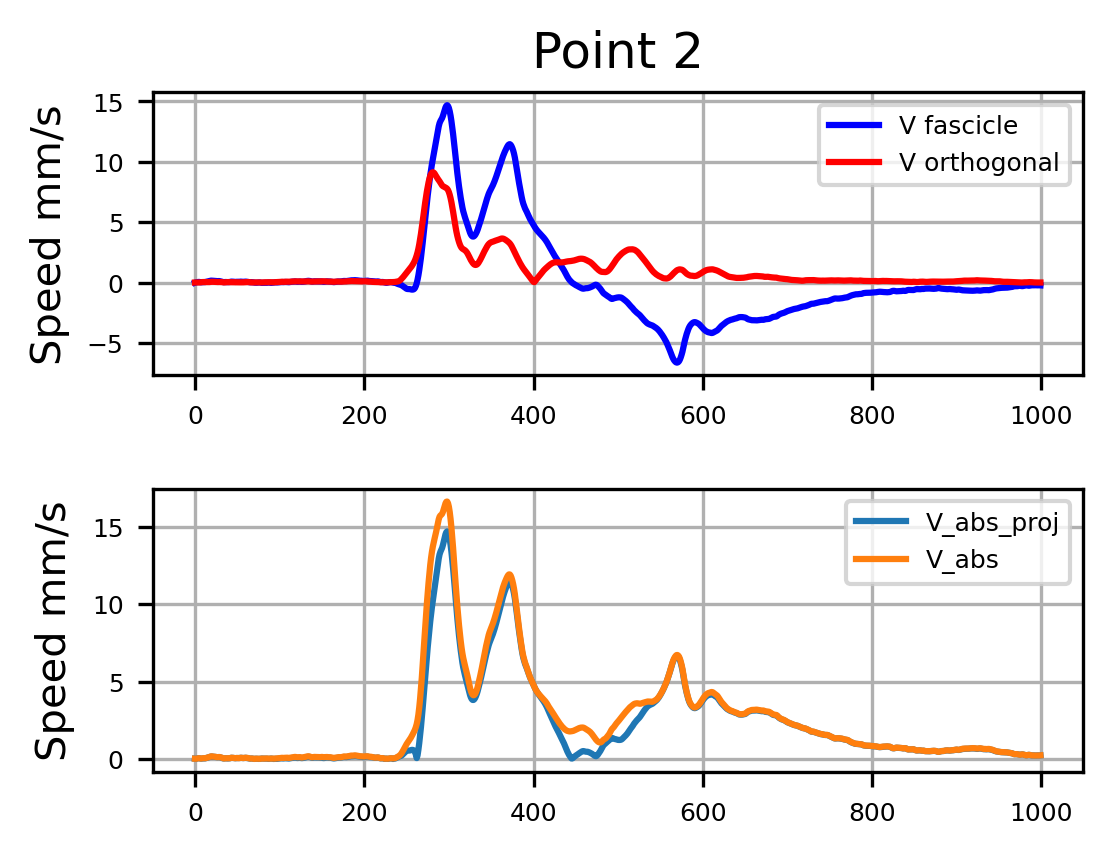

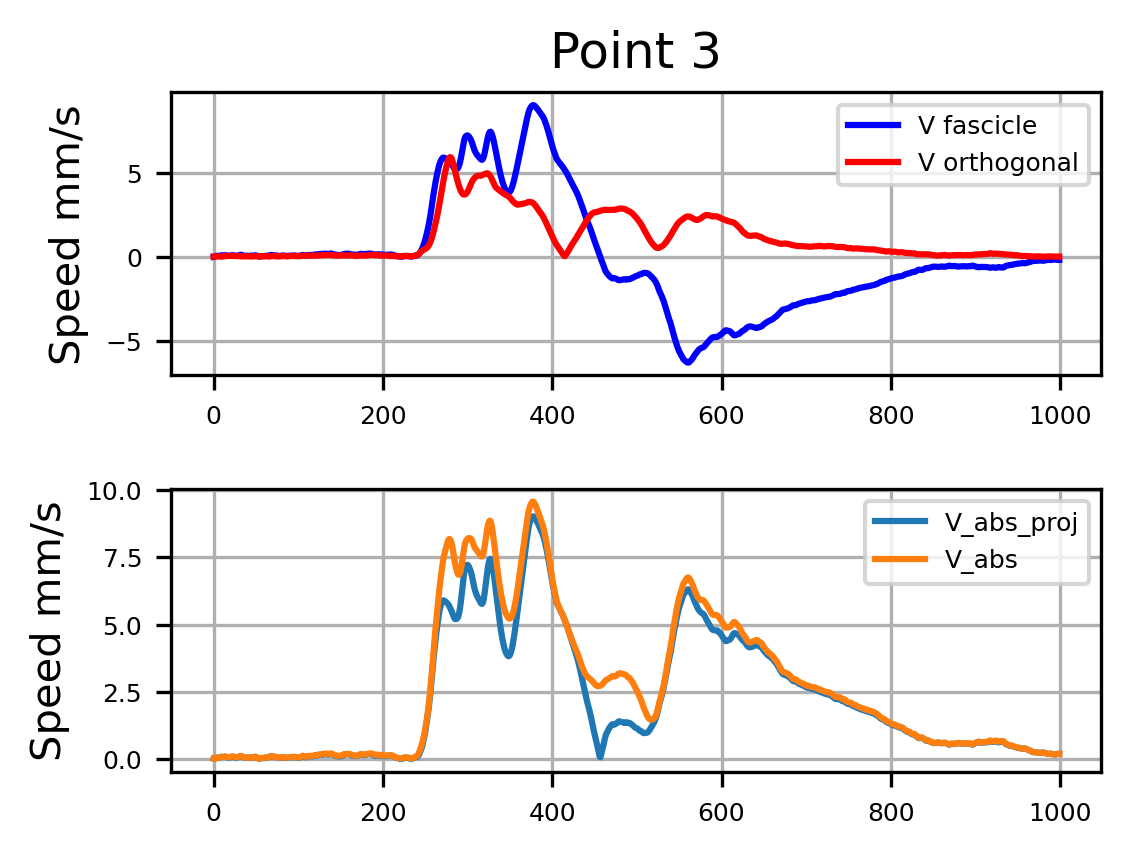

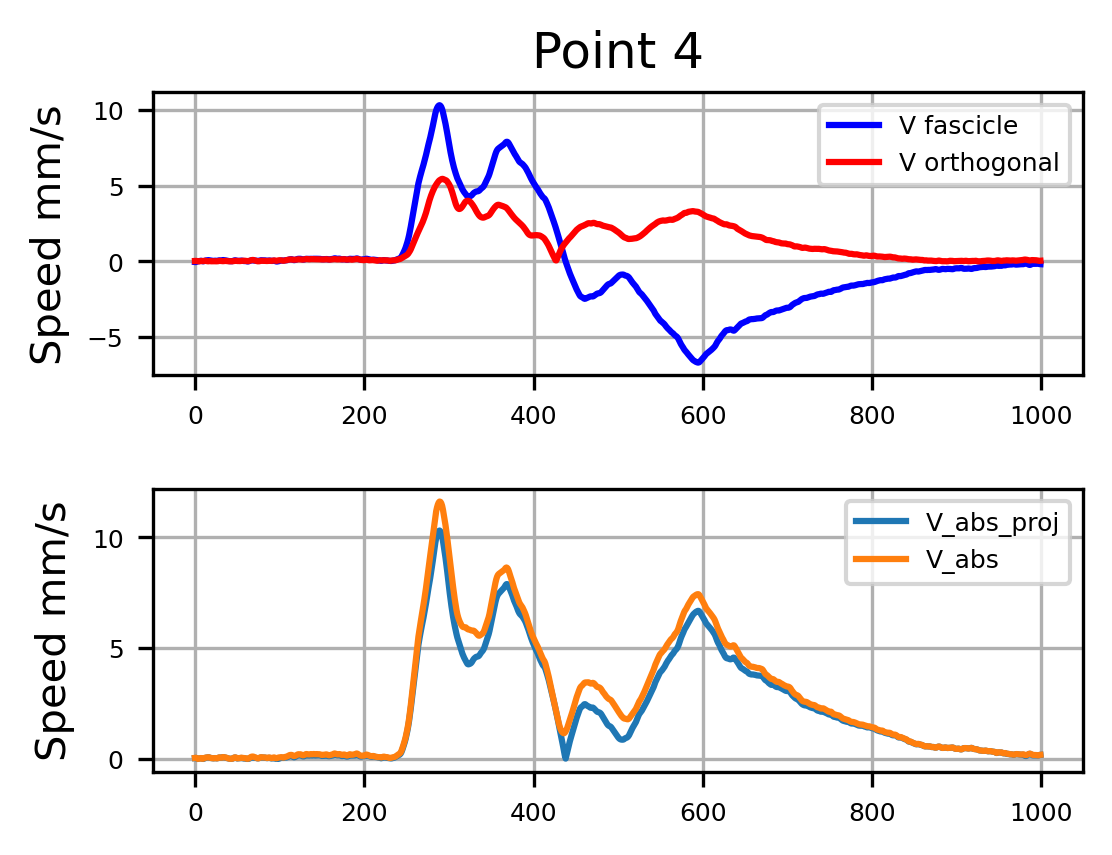

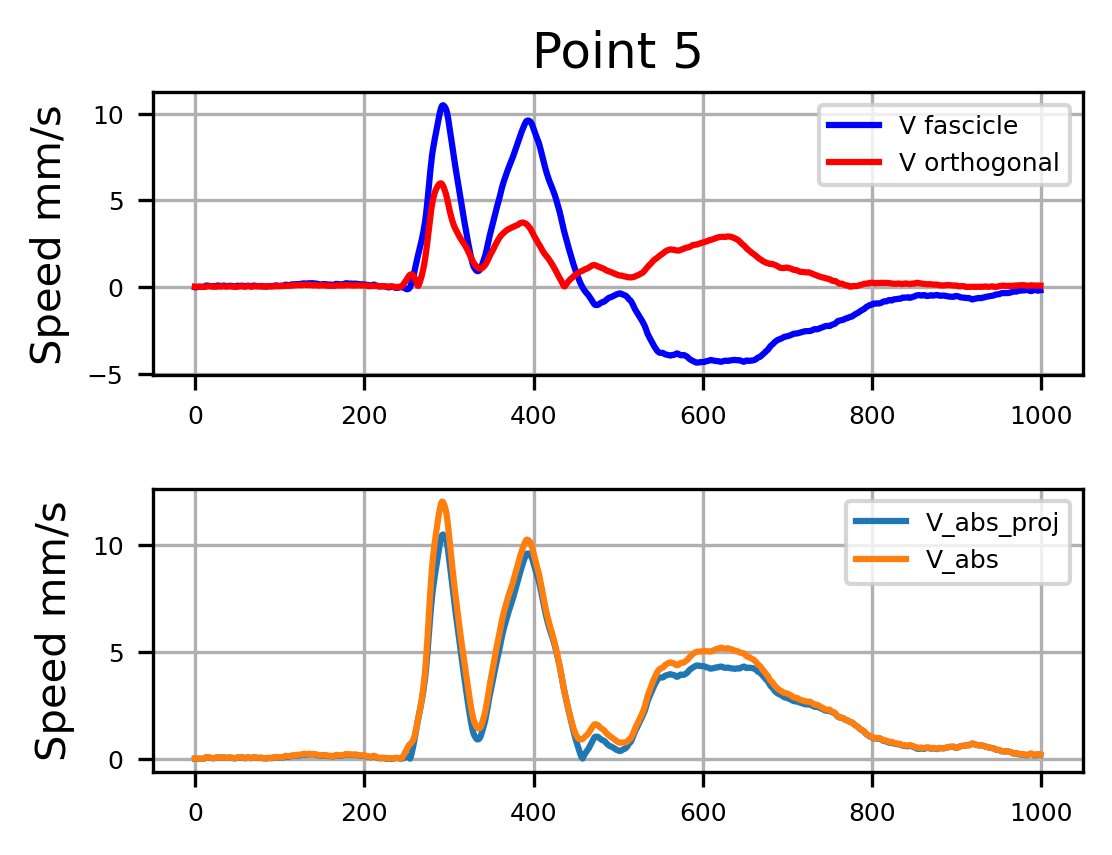

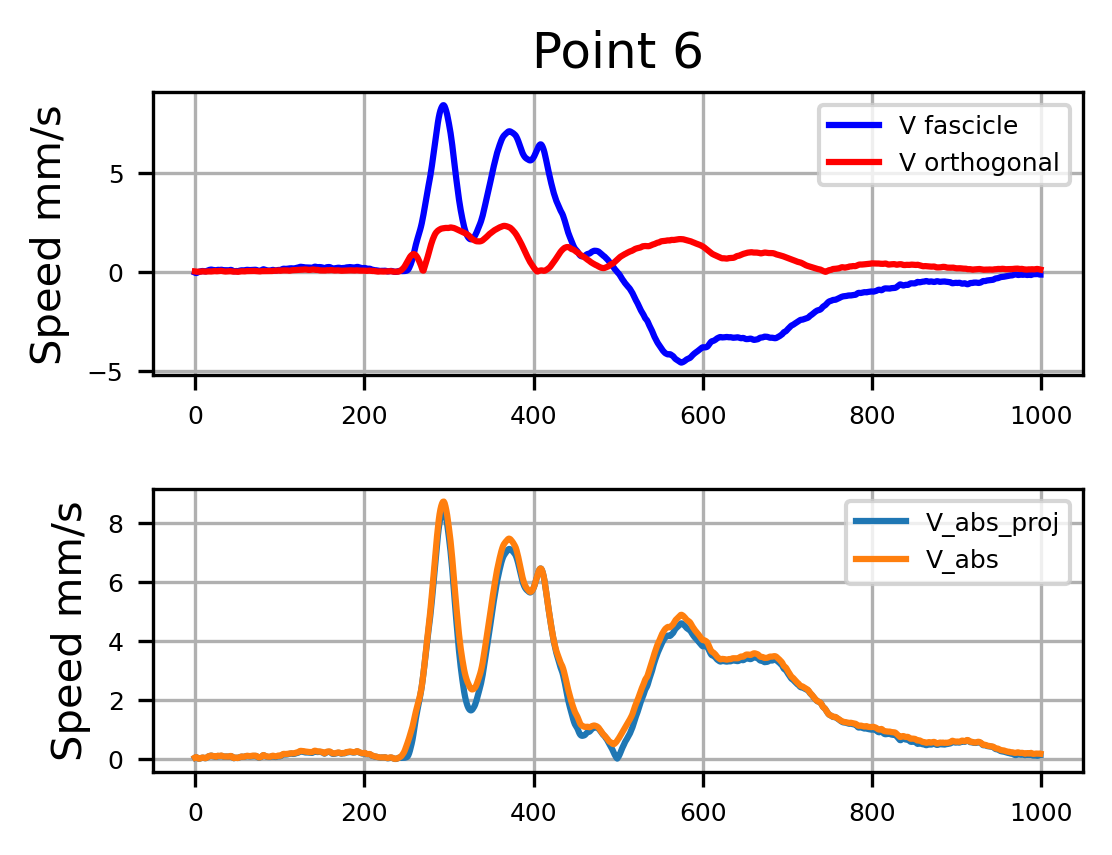

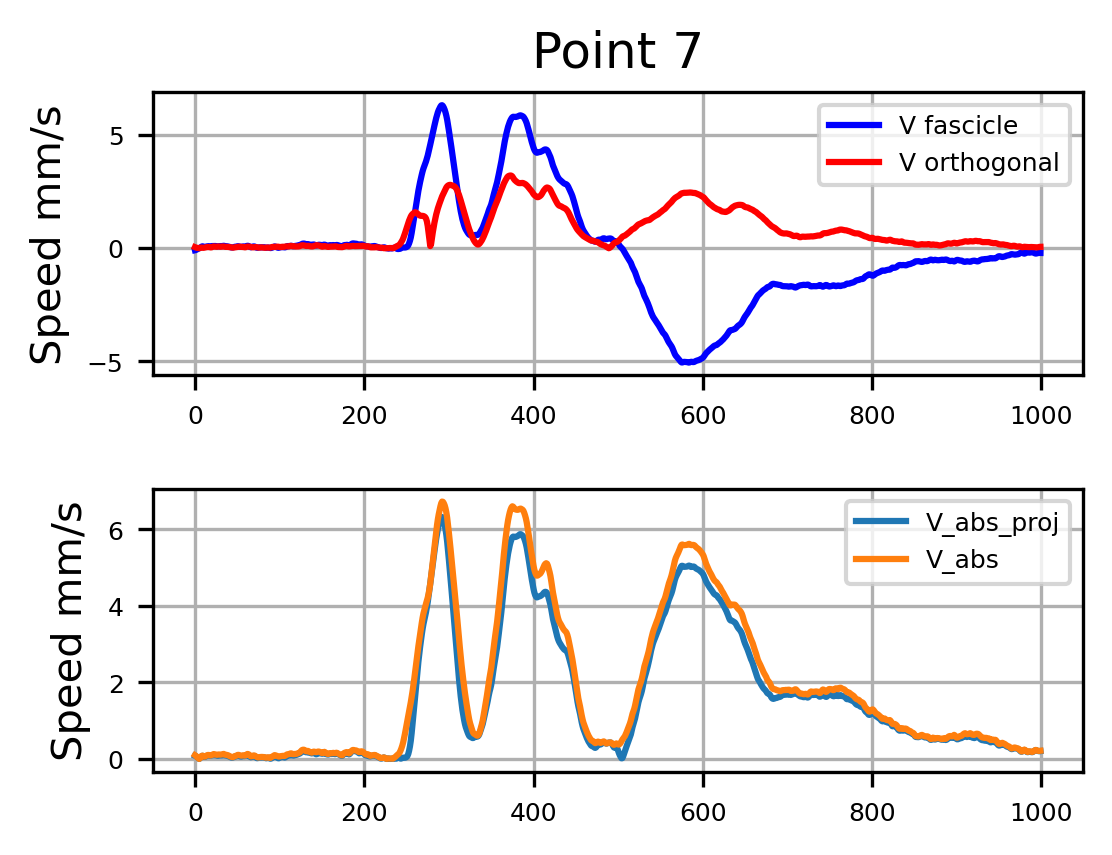

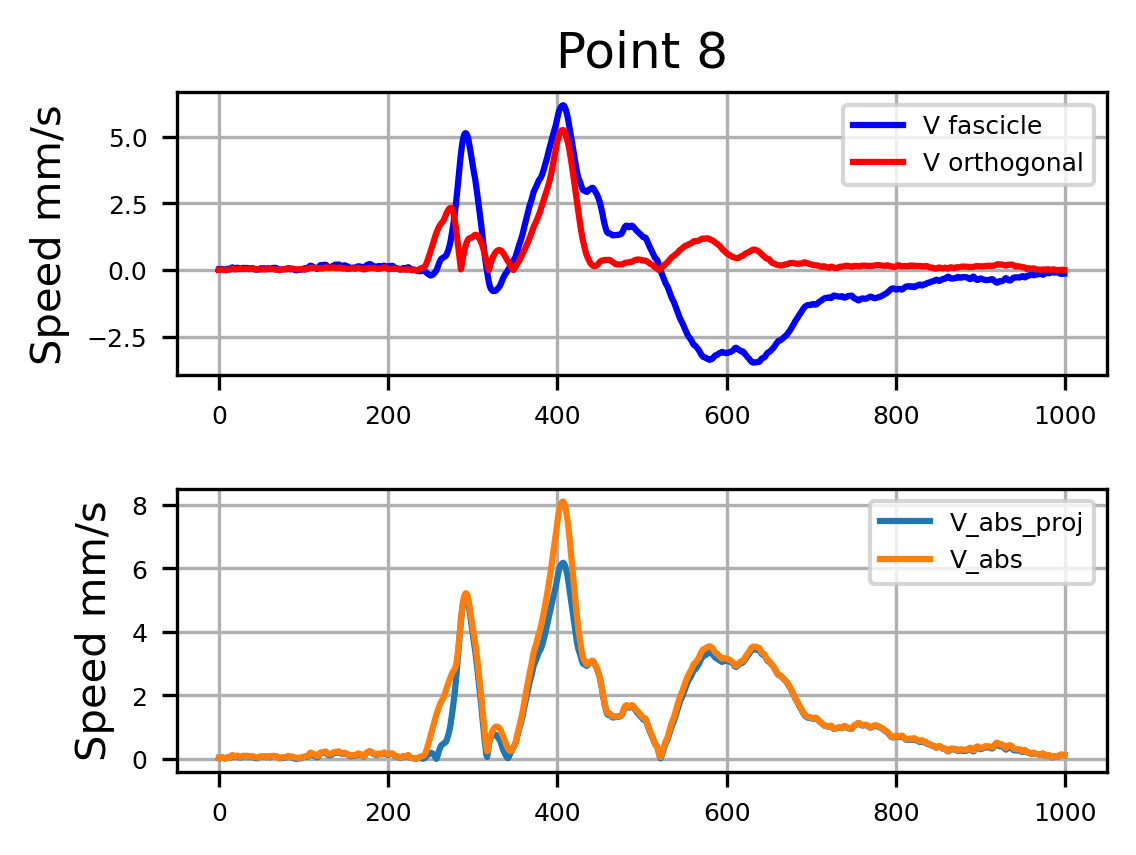

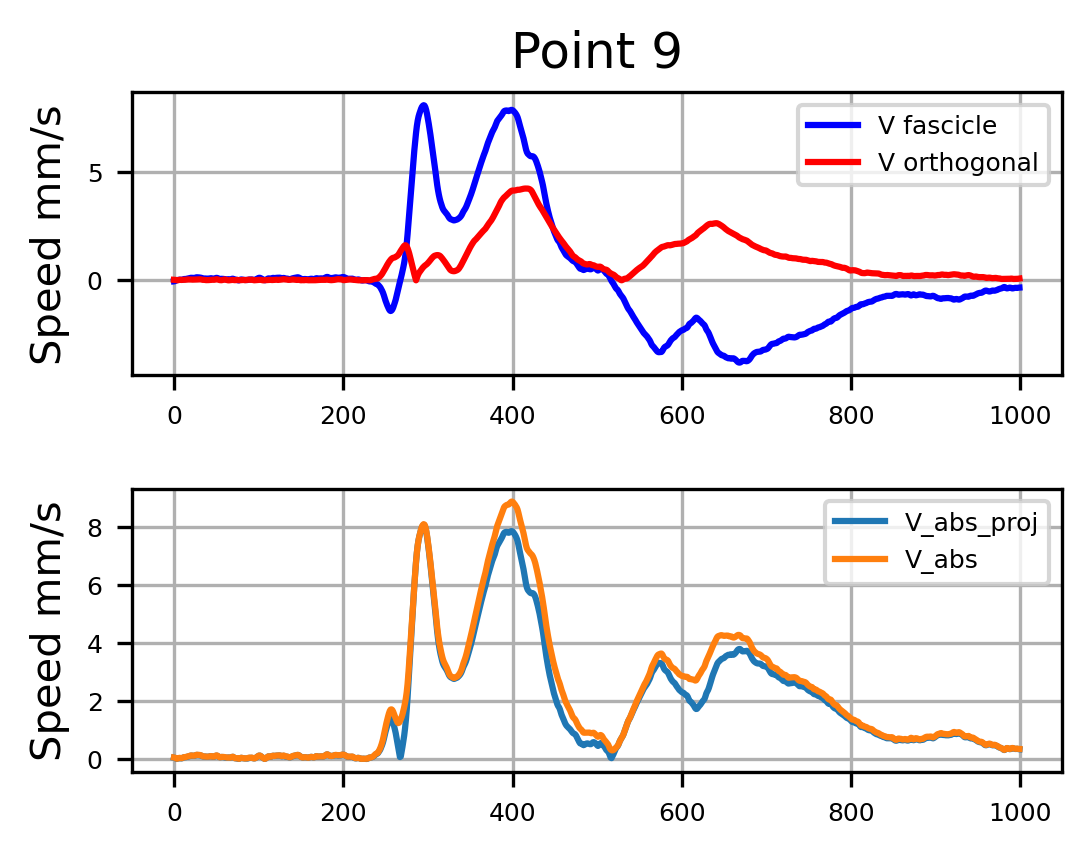

In [27]:
for pt_idx in range(10):
    fig = plt.figure(figsize=(4,3), dpi = dpi)

    ax_2 = fig.add_subplot(212,)
    ax_1 = fig.add_subplot(211, sharex = ax_2)

    ax_1.plot(speeds_proj_fasc[200:1200, pt_idx], 
             markersize = 1,
             color='blue',
             label = 'V fascicle')

    ax_1.plot(speed_proj_orth[200:1200, pt_idx], 
             markersize = 1,
             color='red',
             label = 'V orthogonal')

    ax_1.set_title('Point ' + str(pt_idx))
    ax_1.set_ylabel('Speed mm/s')

    ax_1.grid()
    ax_1.legend()

    ax_2.plot(np.abs(speeds_proj_fasc[200:1200, pt_idx]), label='V_abs_proj')
    ax_2.plot(np.linalg.norm(speeds[200:1200, pt_idx, :], axis = -1), label='V_abs')

    ax_2.set_ylabel('Speed mm/s')

    ax_2.grid()
    ax_2.legend()

    plt.subplots_adjust(hspace=0.4)

    # Save a figure
    fig.savefig('components_along_the_fascicle_point_' + str(pt_idx) + '.png', format = 'png', dpi = 300, bbox_inches='tight')

plt.show()

# Find the starting points of the contraction

In [28]:
time_arr_ms = np.arange(0, speeds.shape[0], 1) * 1/framerate

In [29]:
speed_arr = speeds_proj
time_arr_sel = time_arr_ms

In [30]:
sel_points_all = [i for i in range(speed_arr.shape[1])]

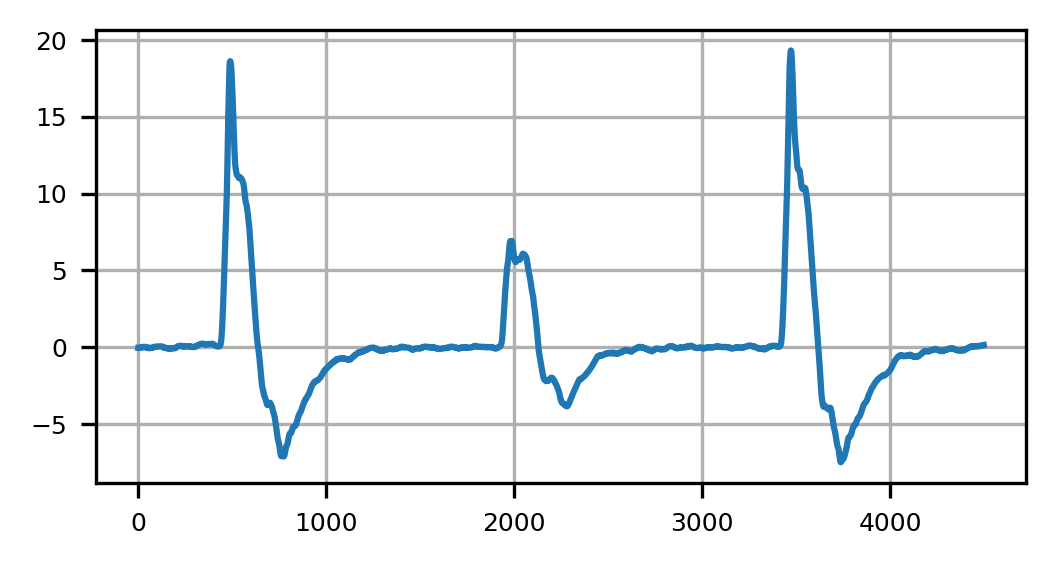

In [31]:
fig = plt.figure(figsize=(4, 2), dpi = dpi)

plt.plot(speeds_proj[:, 0])
plt.grid()
plt.show()

In [32]:
number_of_contr = 1

# Select the data for the contraction based on the figure above
speed_arr = speeds_proj[400:1000]
time_arr_sel = time_arr_ms[400:1000]

In [33]:
from scipy.signal import argrelextrema

def extract_starting_points(data, points_list, n_points_extr=5, speed_ratio=0.12):

    contraction_start_idx_list = []

    for point_idx in points_list:

        # Find the first maximum
        speed_local = data[:, point_idx]
        max_speed = np.abs(speed_local).max()


        peaks_candidates = argrelextrema(np.abs(speed_local), np.greater, order=n_points_extr)[0]
        for i, peak_idx in enumerate(peaks_candidates):
            if (np.abs(speed_local[peak_idx]) > max_speed*speed_ratio):
                max_idx = i
                break

        x_max_speed_idx = peaks_candidates[max_idx]
        speed_2_arr_local = np.abs(speed_local[:x_max_speed_idx])

        # Find the start point ( the most left point for which all previous values are lower)
        sorted_arr = np.argsort(speed_2_arr_local)
        temp_idx = np.where((sorted_arr[1:] - sorted_arr[:-1] != 1))[0][-1] + 1
        
        start_idx = sorted_arr[temp_idx]

        # Sanity Check
        SNR = speed_ratio*max_speed/speed_2_arr_local[:start_idx].max()
        print('SNR point ', str(point_idx), ': ', "{:.1f}".format(SNR))
        if (SNR <= 1.1):
            print('Error. Peak amplitude is lower or equal to noise amplitude')

        contraction_start_idx_list.append(start_idx)
        # For debug
        
    return SNR, contraction_start_idx_list

In [34]:
_, contraction_start_idx_list  = extract_starting_points(speed_arr, 
                                                     sel_points_all,
                                                     n_points_extr=2, 
                                                     speed_ratio=0.12)

SNR point  0 :  13.5
SNR point  1 :  12.8
SNR point  2 :  3.0
SNR point  3 :  8.4
SNR point  4 :  7.3
SNR point  5 :  8.4
SNR point  6 :  5.1
SNR point  7 :  6.1
SNR point  8 :  3.8
SNR point  9 :  6.4


## Visualize the contraction profile

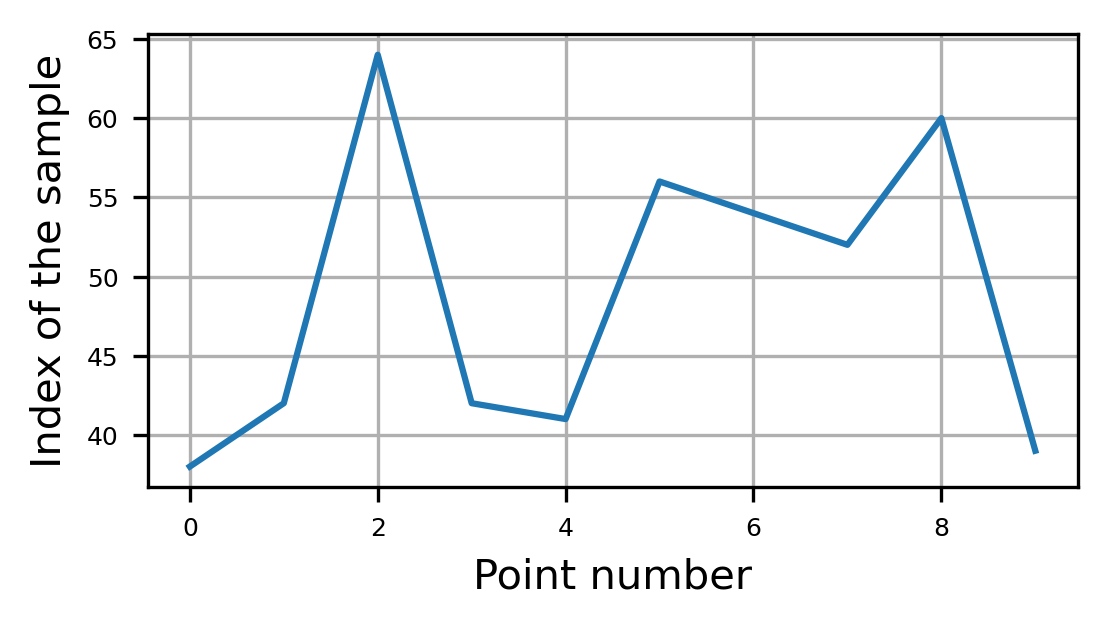

In [35]:
fig = plt.figure(figsize=(4, 2), dpi = dpi)

plt.plot(contraction_start_idx_list)
plt.grid()
plt.xlabel('Point number')
plt.ylabel('Index of the sample')
plt.show()

## Save the data

In [36]:
if not os.path.exists("./output"):
    os.makedirs("./output")

np.savetxt("output/speed_arr_contraction_" + str(number_of_contr) + ".csv", 
           speed_arr, delimiter=",")

np.savetxt("output/time_arr_contraction_" + str(number_of_contr) + ".csv", 
           time_arr_sel, delimiter=",")

np.savetxt("output/onsets_indices_python_notation_" + str(number_of_contr) + ".csv", 
           np.array(contraction_start_idx_list), delimiter=",")